### Read File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('nums.csv', header = None, names = ['x','y'])
df

,x,y
0,-100,-86.078645
1,-99,-103.592973
2,-98,-104.939150
3,-97,-98.442417
4,-96,-107.162430
...,...,...
196,96,86.526324
197,97,110.129724
198,98,93.923760
199,99,82.611293


### Create Model and plot result

Slope: 1.0096196680539198 Intercept: 0.5390798758879426
0.9622447752353038


<Axes: >

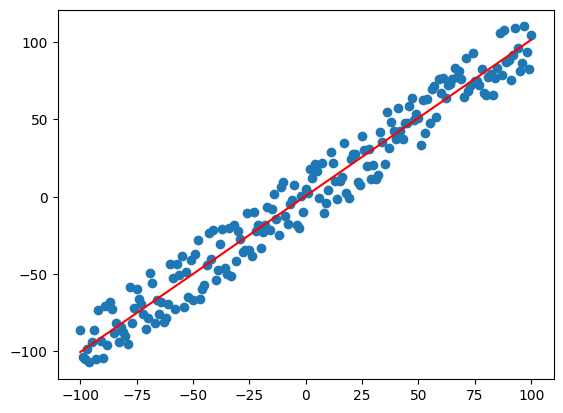

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
fig, ax = plt.subplots()
x, y = df['x'].values.reshape(-1,1) , df['y'].values
ax.scatter(x, y)
model = LinearRegression().fit(x,y)
ax.plot(x,model.predict(x), color = 'r')
slope, intercept = model.coef_[0], model.intercept_
print(f'Slope: {slope} Intercept: {intercept}')
r2 = r2_score(y,model.predict(x))
print(r2)
ax

### Create video animation of plot points appearing using moviepy

Moviepy - Building video test.mp4.
Moviepy - Writing video test.mp4



Moviepy - Done !
Moviepy - video ready test.mp4
MoviePy - Building file test1.gif with imageio.


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


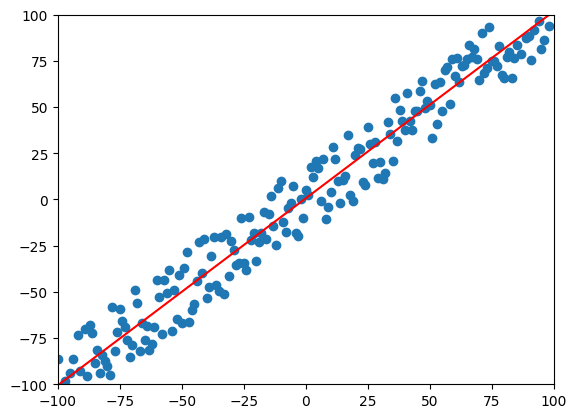

In [3]:
from moviepy.editor import VideoClip
import numpy as np
from moviepy.video.io.bindings import mplfig_to_npimage

duration = 2
fig, ax = plt.subplots()
model = LinearRegression()

def make_frame(t):
	ax.clear()
	ax.set_xlim(-100,100)
	ax.set_ylim(-100,100)
	frame_num = int(t*100) #Increasing t speeds up how fast the line is drawn
	ax.scatter(df['x'][:frame_num], df['y'][:frame_num])
	if frame_num > 1:
		x = df['x'][:frame_num].values.reshape(-1,1)
		y = df['y'][:frame_num].values.reshape(-1,1)
		model.fit(x,y)
		y_vals = model.predict(x)
		ax.plot(x,y_vals,color = 'red')
	return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration = duration)
animation.write_videofile('test.mp4', fps = 200)
animation.write_gif('test1.gif', fps = 24)
animation.ipython_display(fps = 200, loop = True, autoplay = True) #Directly generate and display in notebook

MoviePy - Building file test2.gif with imageio.


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


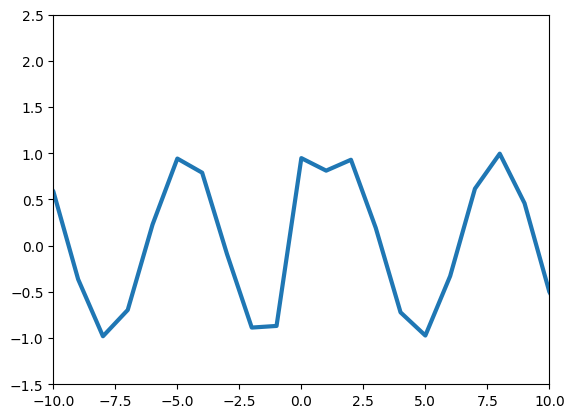

In [4]:
fig, ax = plt.subplots()
def make_frame(t):
    ax.clear()
    ax.plot(x, np.sinc(x**2) + np.sin(x + 2*np.pi/duration * t), lw=3)
    ax.set_xlim(-10,10)
    ax.set_ylim(-1.5, 2.5)
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration = duration)
animation.write_gif('test2.gif',fps = 24)
animation.ipython_display(fps = 60, loop = True, autoplay = True)